In this independent research project, my primary objectives are to conduct a comprehensive analysis of the Formula 1 market and gain valuable insights into both established and emerging markets. To achieve these goals, I will employ various data manipulation techniques, utilize the Formula+ API to gather relevant data, and conduct in-depth data exploration.

In [2]:
import requests
import pandas as pd
import pandas as pd


def fetch_circuits_data(year):
    url = f'http://ergast.com/api/f1/{year}/circuits.json'
    
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        circuits = data['MRData']['CircuitTable']['Circuits']
        circuit_data = []
        for circuit in circuits:
            circuit_data.append({
                'Year': year, 
                'Circuit ID': circuit['circuitId'],
                'Circuit Name': circuit['circuitName'],
                'Location': circuit['Location']['locality'],
                'Country': circuit['Location']['country'],
                'Latitude': circuit['Location']['lat'],
                'Longitude': circuit['Location']['long'],
                # Add more fields as needed
            })
        
        # Create a DataFrame from the circuit_data list
        df = pd.DataFrame(circuit_data)
        return df
    else:
        print(f"Failed to fetch data for year {year}. Status code: {response.status_code}")
        return None
    
    
current_year = pd.Timestamp.now().year
years = range(1952, current_year + 1)
all_dataframes = []
for year in years:
    circuits_df = fetch_circuits_data(year)
    if circuits_df is not None:
        all_dataframes.append(circuits_df)
result_df = pd.concat(all_dataframes, ignore_index=True)
print(result_df)
result_df['Country'] = result_df['Country'].replace('United States',"USA")

      Year    Circuit ID                    Circuit Name      Location  \
0     1952    bremgarten              Circuit Bremgarten          Bern   
1     1952       essarts               Rouen-Les-Essarts         Rouen   
2     1952  indianapolis     Indianapolis Motor Speedway  Indianapolis   
3     1952         monza    Autodromo Nazionale di Monza         Monza   
4     1952   nurburgring                     Nürburgring       Nürburg   
...    ...           ...                             ...           ...   
1077  2023        suzuka                  Suzuka Circuit        Suzuka   
1078  2023         vegas  Las Vegas Strip Street Circuit     Las Vegas   
1079  2023    villeneuve       Circuit Gilles Villeneuve      Montreal   
1080  2023    yas_marina              Yas Marina Circuit     Abu Dhabi   
1081  2023     zandvoort          Circuit Park Zandvoort     Zandvoort   

            Country Latitude Longitude  
0       Switzerland  46.9589   7.40194  
1            France  49.3306 

In [3]:
result_df.dtypes #always insepct youre dataset to know what kind of analysis can done 

Year             int64
Circuit ID      object
Circuit Name    object
Location        object
Country         object
Latitude        object
Longitude       object
dtype: object

In [4]:
print(result_df.describe(include="object")) # I Wanted a quick snapshot of the data set 

       Circuit ID                  Circuit Name Location Country Latitude  \
count        1082                          1082     1082    1082     1082   
unique         77                            77       75      34       77   
top         monza  Autodromo Nazionale di Monza    Monza   Italy  45.6156   
freq           71                            71       71     103       71   

       Longitude  
count       1082  
unique        77  
top      9.28111  
freq          71  


I ran this command , just to get an overview of the variables. The most common circuit is Monza in Italy. On doing a quick Q & A with chatgpt this is what it told me about Monza Its :Historic Background: Italy has been an integral part of Formula 1 since its inception in 1950. The country's motorsport heritage, passion for racing, and rich history in automotive engineering have made it a natural host for numerous Grand Prix events.Ferrari's Home: Ferrari, one of the most successful and iconic teams in Formula 1 history, is based in Maranello, Italy. The strong presence of Ferrari in the sport has contributed to Italy's influence and importance in Formula 1.Passionate Fanbase: Italy boasts a passionate and dedicated fanbase for motorsport, especially Formula 1. The "tifosi," as Ferrari fans are known, bring a unique atmosphere and energy to the Italian Grand Prix, making it a highlight of the racing calendar.

In [5]:
#At this point i was trying to find if any Circuits had changed names so that i have an accurate No of unique circuits
for index, row in result_df[["Circuit Name", "Circuit ID","Year"]].iterrows():
    print(row["Circuit Name"], row["Circuit ID"],row["Year"])

Circuit Bremgarten bremgarten 1952
Rouen-Les-Essarts essarts 1952
Indianapolis Motor Speedway indianapolis 1952
Autodromo Nazionale di Monza monza 1952
Nürburgring nurburgring 1952
Silverstone Circuit silverstone 1952
Circuit de Spa-Francorchamps spa 1952
Circuit Park Zandvoort zandvoort 1952
Circuit Bremgarten bremgarten 1953
Autódromo Juan y Oscar Gálvez galvez 1953
Indianapolis Motor Speedway indianapolis 1953
Autodromo Nazionale di Monza monza 1953
Nürburgring nurburgring 1953
Reims-Gueux reims 1953
Silverstone Circuit silverstone 1953
Circuit de Spa-Francorchamps spa 1953
Circuit Park Zandvoort zandvoort 1953
Circuit Bremgarten bremgarten 1954
Autódromo Juan y Oscar Gálvez galvez 1954
Indianapolis Motor Speedway indianapolis 1954
Autodromo Nazionale di Monza monza 1954
Nürburgring nurburgring 1954
Circuit de Pedralbes pedralbes 1954
Reims-Gueux reims 1954
Silverstone Circuit silverstone 1954
Circuit de Spa-Francorchamps spa 1954
Aintree aintree 1955
Autódromo Juan y Oscar Gálvez g

In [7]:
import matplotlib.pyplot as plt

To understand  the data its better to first aggregate  the data and then go into the granular investigations to understand why we are seeing certain trends 

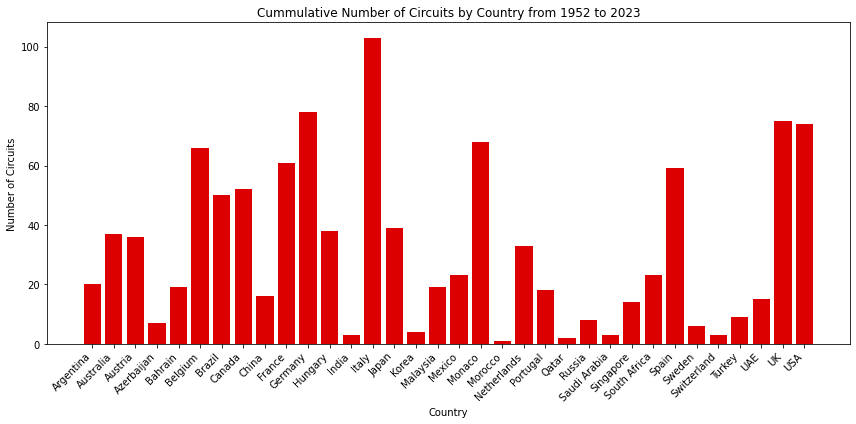

In [9]:
grouped_df = result_df.groupby('Country').size().reset_index(name='Count')
formula_one_red = '#DC0000'

# Create a bar graph to show the count of circuits for each country
plt.figure(figsize=(12, 6))
plt.bar(grouped_df['Country'], grouped_df['Count'],color=formula_one_red)
plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.title('Cummulative Number of Circuits by Country from 1952 to 2023')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As a business analyst, I aimed to gain a comprehensive understanding of the Formula 1 market. My dataset spanned from 1952 to 2023, revealing that Formula 1 has been hosted in more than 34 countries. The top 5 countries that have consistently hosted Formula 1 events are Germany, Italy, Monaco, the UK, and the USA.

To enrich my research, I intend to incorporate Twitter data, analyzing engagement metrics to shed light on the performance of these markets. This integration will help unveil insights and potential correlations between social media engagement and the popularity of Formula 1 in these countries.

Moreover, I am keen on identifying emerging markets that may hold untapped potential for the Formula 1 team. By exploring data-driven trends and engagement patterns, I aspire to uncover new opportunities and strategically position Formula 1 in promising markets to expand its global reach. 

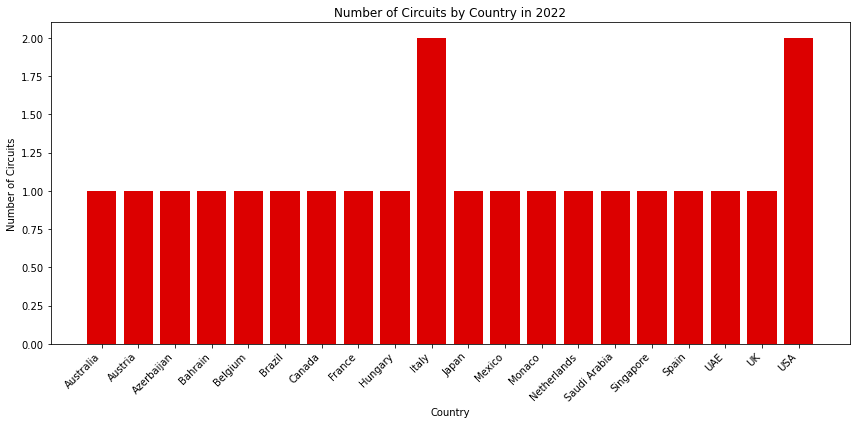

In [45]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only circuits from the year 2022
circuits_2022 = result_df[result_df['Year'] == 2022]

# Group the circuits by country and calculate the count
circuits_count_2022 = circuits_2022.groupby('Country').size().reset_index(name='Count')

# Create a bar graph to show the count of circuits for each country in 2022
plt.figure(figsize=(12, 6))
plt.bar(circuits_count_2022['Country'], circuits_count_2022['Count'],color=formula_one_red)
plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.title('Number of Circuits by Country in 2022')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

If you compare the Plot with cummulative data against this one some of the countries that have stopped hosting formula 1 include : Argentina,China,India,Korea, Malaysia,Morrocco,Portugal ,Qatar ,Russia,Saudi Arabia,Switzerland and Turkey. I was triggered to understand what could have happened in these markets. Does it open a discussion of developing a product portfolio to meet the demands of markets that were in these countries. 

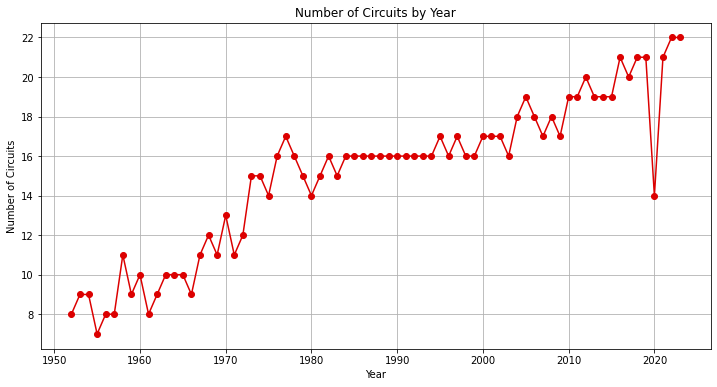

In [48]:
# Generate the count of circuits for each year
circuits_count_by_year = result_df.groupby('Year')['Circuit Name'].count()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(circuits_count_by_year.index, circuits_count_by_year.values, marker='o', color=formula_one_red)

# Customize the chart
plt.title('Number of Circuits by Year')
plt.xlabel('Year')
plt.ylabel('Number of Circuits')
plt.grid(True)

# Show the chart
plt.show()


Upon analyzing the data spanning from 1950 to 2023, a remarkable observation emerges: the number of circuits has more than doubled over this period, indicating a consistent upward trend. This progressive growth suggests a notable expansion in the domain of Formula_1. However, the period around 1980-2000 draws particular attention due to a pronounced surge in the number of circuits. To gain a deeper understanding of this significant development, further investigation is warranted to uncover the underlying factors and events that contributed to the no growth in those years.

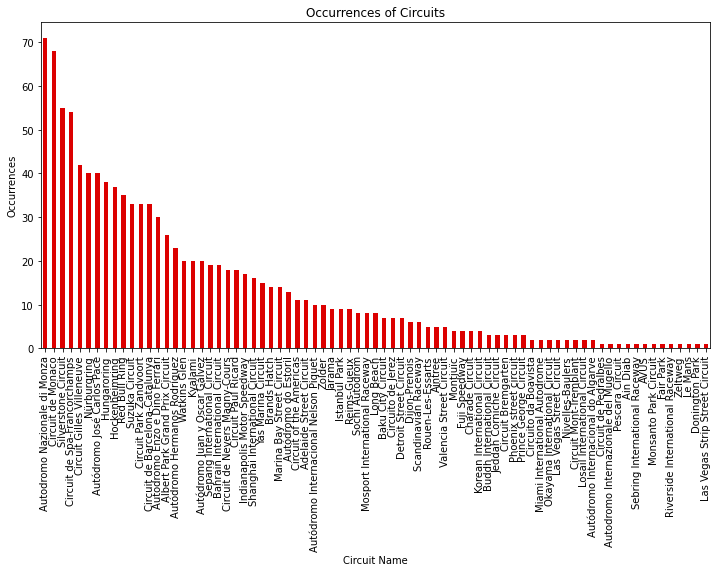

In [28]:
# Generate value counts by circuit name
circuit_value_counts = result_df['Circuit Name'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = circuit_value_counts.plot(kind='bar', color=formula_one_red)

# Customize the chart
plt.title('Occurrences of Circuits')
plt.xlabel('Circuit Name')
plt.ylabel('Occurrences')



# Show the chart
plt.show()

We take a thrilling journey through history to unveil the top three circuits with the highest occurrence in Formula 1. These racing gems have witnessed triumphs, rivalries, and captivating battles that continue to captivate fans worldwide.These include Autodromo Nazionale di Monza, Circuit De Monaco & Silverstone. From this Analysis it means that Italy , England and France are the top markets for Formula 1

In [29]:
circuit_counts = result_df['Circuit Name'].value_counts()
# Get the circuit with the highest count (i.e., the most number of times it has occurred)
most_common_circuit = circuit_counts.idxmax()
most_common_circuit_count = circuit_counts.max()
print(f"The circuit that has happened the most number of times is '{most_common_circuit}' with {most_common_circuit_count} occurrences.")


The circuit that has happened the most number of times is 'Autodromo Nazionale di Monza' with 71 occurrences.
